>代码来自 **MOOC嵩天 数据分析教程**

# 图像的手绘效果




In [1]:
import numpy as np
from PIL import Image

In [2]:
a = np.asarray(Image.open('f:/test/Numpy/huoying02.jpg').convert('L')).astype('float')

## 梯度的重构
* 利用像素之间的梯度值和虚拟深度值对图像进行重构
* 根据灰度变化来模拟人类视觉的明暗程度


In [3]:
depth = 10 #预设虚拟深度值为10 取值范围0-100
grad = np.gradient(a) 
grad_x, grad_y = grad # 提取x,y方向的梯度值
grad_x = grad_x * depth/100. # 根据深度调整x和y方向的梯度值
grad_y = grad_y * depth/100.

    
## 梯度归一化
* 构造x和y轴梯度的三维归一化单位坐标系
* 梯度和光源相互作用，将梯度转化为灰度

In [4]:
A = np.sqrt(grad_x**2 + grad_y**2 +1.)# 构造x和y轴梯度的三维归一化单位坐标系

In [5]:
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A

## 光源效果
* 根据灰度变化来模拟人类视觉的远近程度
    * 设计一个位于图像斜上方的虚拟光源
    * 光源相对于图像的俯视角为Elevation，方位角为Azimuth
    * 建立光源对个点梯度值的影响函数
    * 运算出各点的新像素值

In [6]:
vec_el = np.pi/2.2 
vec_az = np.pi/4.
# np.cos(vec_el)为单位光线在地平面上的投影长度
# dx,dy,dz是光源对xyz三方向的影响程度
dx = np.cos(vec_el)*np.cos(vec_az) 
dy = np.cos(vec_el)*np.sin(vec_az)
dz = np.sin(vec_el)

In [7]:
b = 255*(dx*uni_x + dy*uni_y +dz*uni_z)# 梯度与光源相互作用，将梯度转化为灰度

## 图像生成
* 为避免数据越界，将生成的灰度值裁剪至0-255区间

In [8]:
b = b.clip(0,255)

In [9]:
im = Image.fromarray(b.astype('uint8'))# 生成图像

In [10]:
im.save('f:/test/Numpy/huoying手绘.jpg')

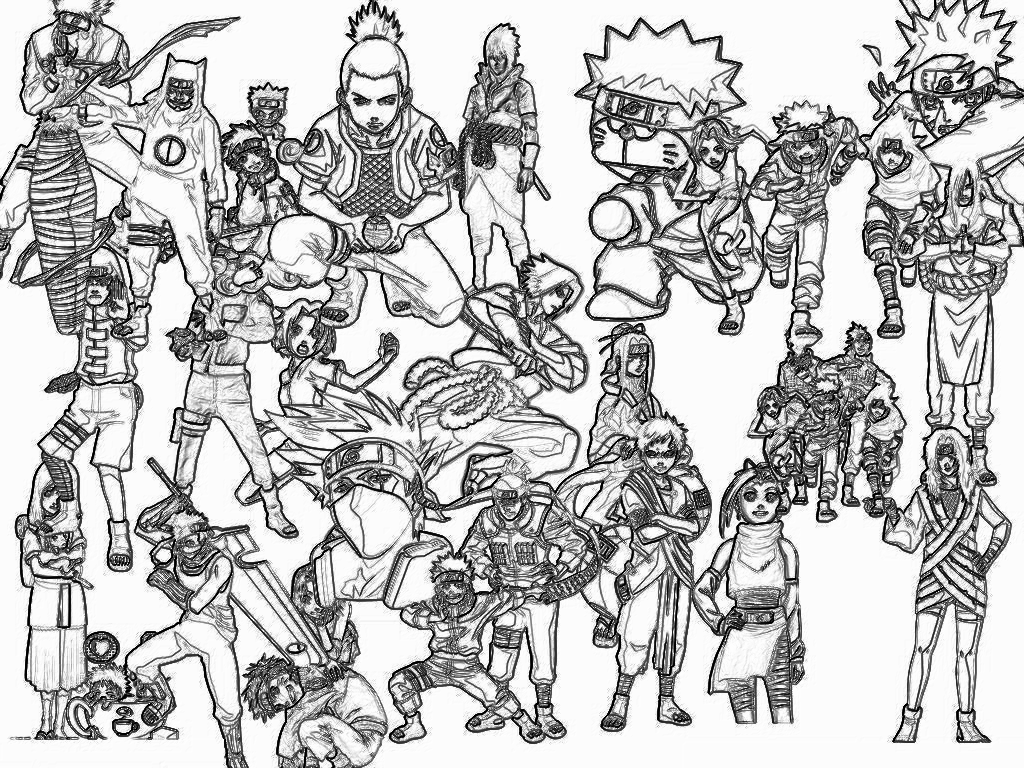

In [11]:
im